In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
sierraleoneData = pd.read_csv("../data/sierraleone-bumbuna.csv")

Getting basic information

In [4]:
sierraleoneData.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [5]:
sierraleoneData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
sierraleoneData.shape

(525600, 19)

Summary statistics

In [7]:
sierraleoneData.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.100000      68.700000       0.000000   
50%         3.400000      25.300000      85.400000       0.800000   
75%       345.400000      29.400000      96.700000       2.000000   
max      1473.000000      39.900000     100.000000      19.200000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        1.691606       0.363823     133.044668       7.172220   
std         1.617053       0.295000     114.284792       7.535093   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.600000       0.400000     161.500000       6.200000   
75%         2.600000       0.600000     234.100000      12.000000   
max        23.900000       4.100000     360.000000      98.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      999.876469       0.000967       0.004806      32.504263   
std         2.104419       0.031074       0.047556      12.434899   
min       993.000000       0.000000       0.000000      10.700000   
25%       999.000000       0.000000       0.000000      23.500000   
50%      1000.000000       0.000000       0.000000      26.600000   
75%      1001.000000       0.000000       0.000000      40.900000   
max      1006.000000       1.000000       2.400000      72.800000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.593091       NaN  
std        12.009161       NaN  
min        11.100000       NaN  
25%        23.800000       NaN  
50%        26.900000       NaN  
75%        41.300000       NaN  
max        70.400000       NaN

Checking for negative values in GHI, DNI, DHI

In [8]:
print((sierraleoneData[['GHI', 'DNI', 'DHI']] < 0).sum())

GHI    261135
DNI    266352
DHI    263128
dtype: int64


In [9]:
sierraleoneData.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

Looking for missing values

In [10]:
sierraleoneData.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Checking for outliers

In [11]:
def outliers(c):
  z_scores = (sierraleoneData[c] - sierraleoneData[c].mean()) / sierraleoneData[c].std()
  outlier = sierraleoneData[np.abs(z_scores) > 3]
  print(c," outliers\n",outlier[c], "\n\n")

In [12]:
outliers("ModA")
outliers("ModB")
outliers("WS")
outliers("WSgust")

ModA  outliers
 662       1142.0
663       1193.0
670       1163.0
671       1237.0
672       1132.0
           ...  
517751    1123.0
517808    1114.0
517811    1112.0
517823    1130.0
520614    1124.0
Name: ModA, Length: 1604, dtype: float64 


ModB  outliers
 662       1116.0
663       1167.0
670       1137.0
671       1208.0
672       1105.0
           ...  
520564    1075.0
520565    1068.0
520608    1070.0
520613    1065.0
520614    1100.0
Name: ModB, Length: 2041, dtype: float64 


WS  outliers
 1279      5.1
2495      7.5
2496      6.2
2497      5.2
2498      5.3
         ... 
522184    5.3
522185    7.1
522194    4.9
523792    5.0
523794    5.0
Name: WS, Length: 3967, dtype: float64 


WSgust  outliers
 1275      6.7
1287      6.7
2495      9.7
2496      7.9
2497      7.2
         ... 
519396    6.9
522183    7.2
522184    6.7
522185    8.4
523794    6.7
Name: WSgust, Length: 3665, dtype: float64 




Time Series Analysis

In [13]:
sierraleoneData["Timestamp"] = pd.to_datetime(sierraleoneData["Timestamp"])
sierraleoneData.sort_values('Timestamp', inplace=True)
def timeSeries(c):
  plt.plot(sierraleoneData['Timestamp'], sierraleoneData[c])
  plt.xlabel('Timestamp')
  plt.ylabel(c)
  plt.title(f'Time series for {c}')
  plt.show()

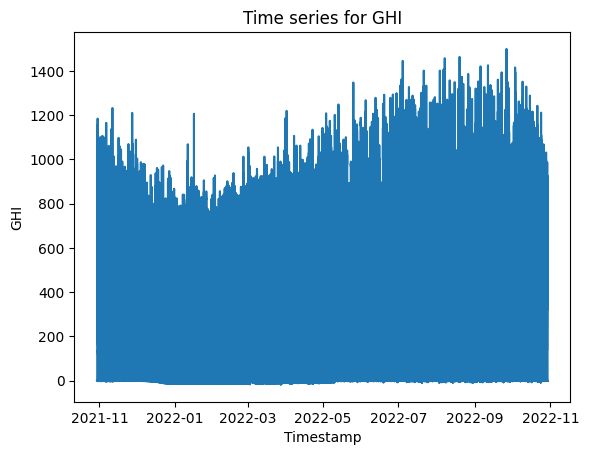

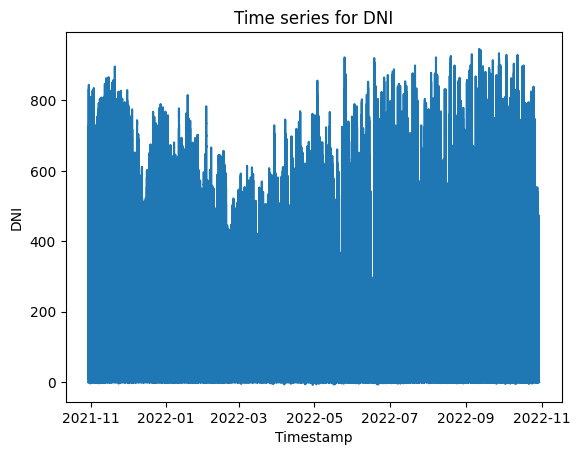

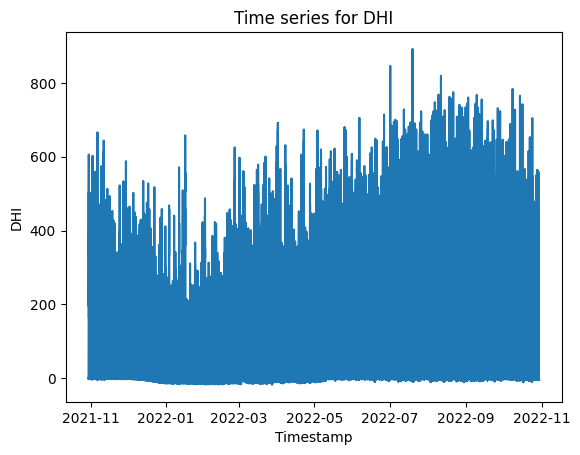

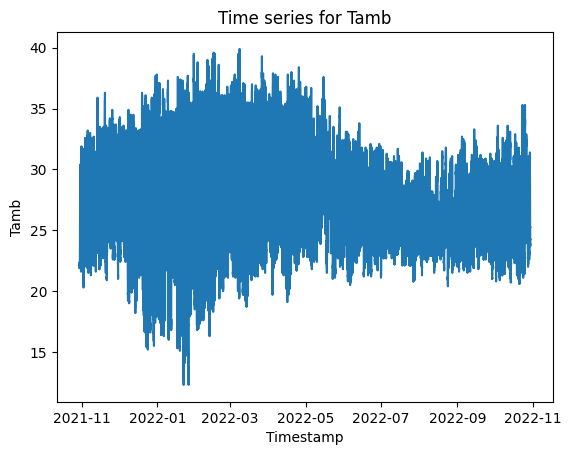

In [14]:
timeSeries("GHI")
timeSeries("DNI")
timeSeries("DHI")
timeSeries("Tamb")

Evaluate the impact of cleaning

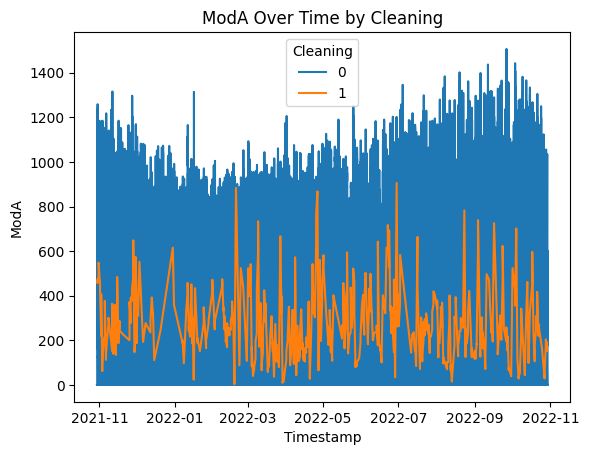

In [15]:
sns.lineplot(x='Timestamp', y='ModA', hue='Cleaning', data=sierraleoneData)
plt.title('ModA Over Time by Cleaning')
plt.show()

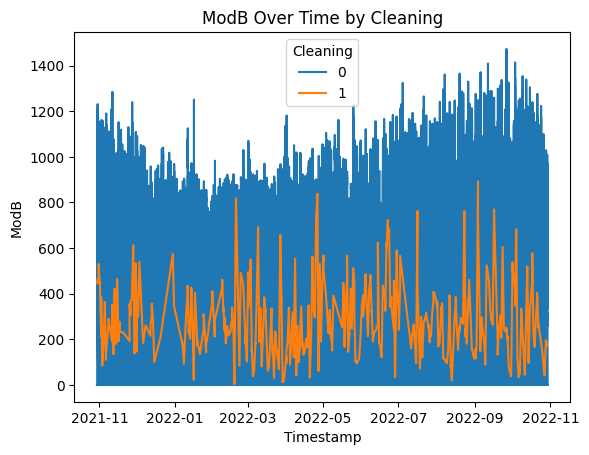

In [16]:
sns.lineplot(x='Timestamp', y='ModB', hue='Cleaning', data=sierraleoneData)
plt.title('ModB Over Time by Cleaning')
plt.show()

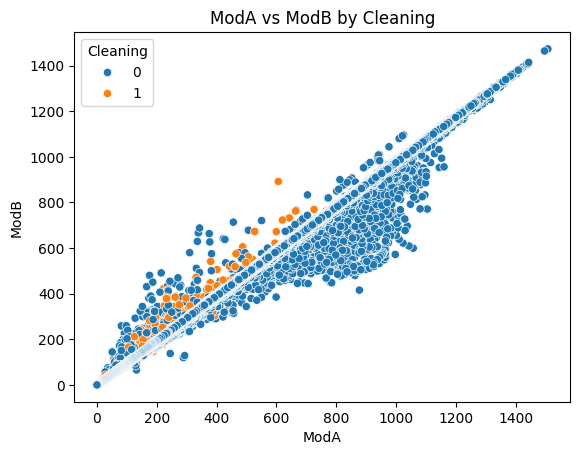

In [17]:
sns.scatterplot(x='ModA', y='ModB', hue='Cleaning', data=sierraleoneData)
plt.title('ModA vs ModB by Cleaning')
plt.show()

Correlation Analysis

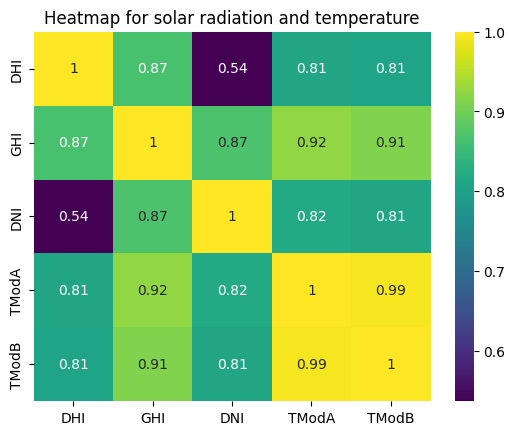

In [18]:
correlation_matrix = sierraleoneData[["DHI","GHI","DNI","TModA","TModB"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Heatmap for solar radiation and temperature')
plt.show()

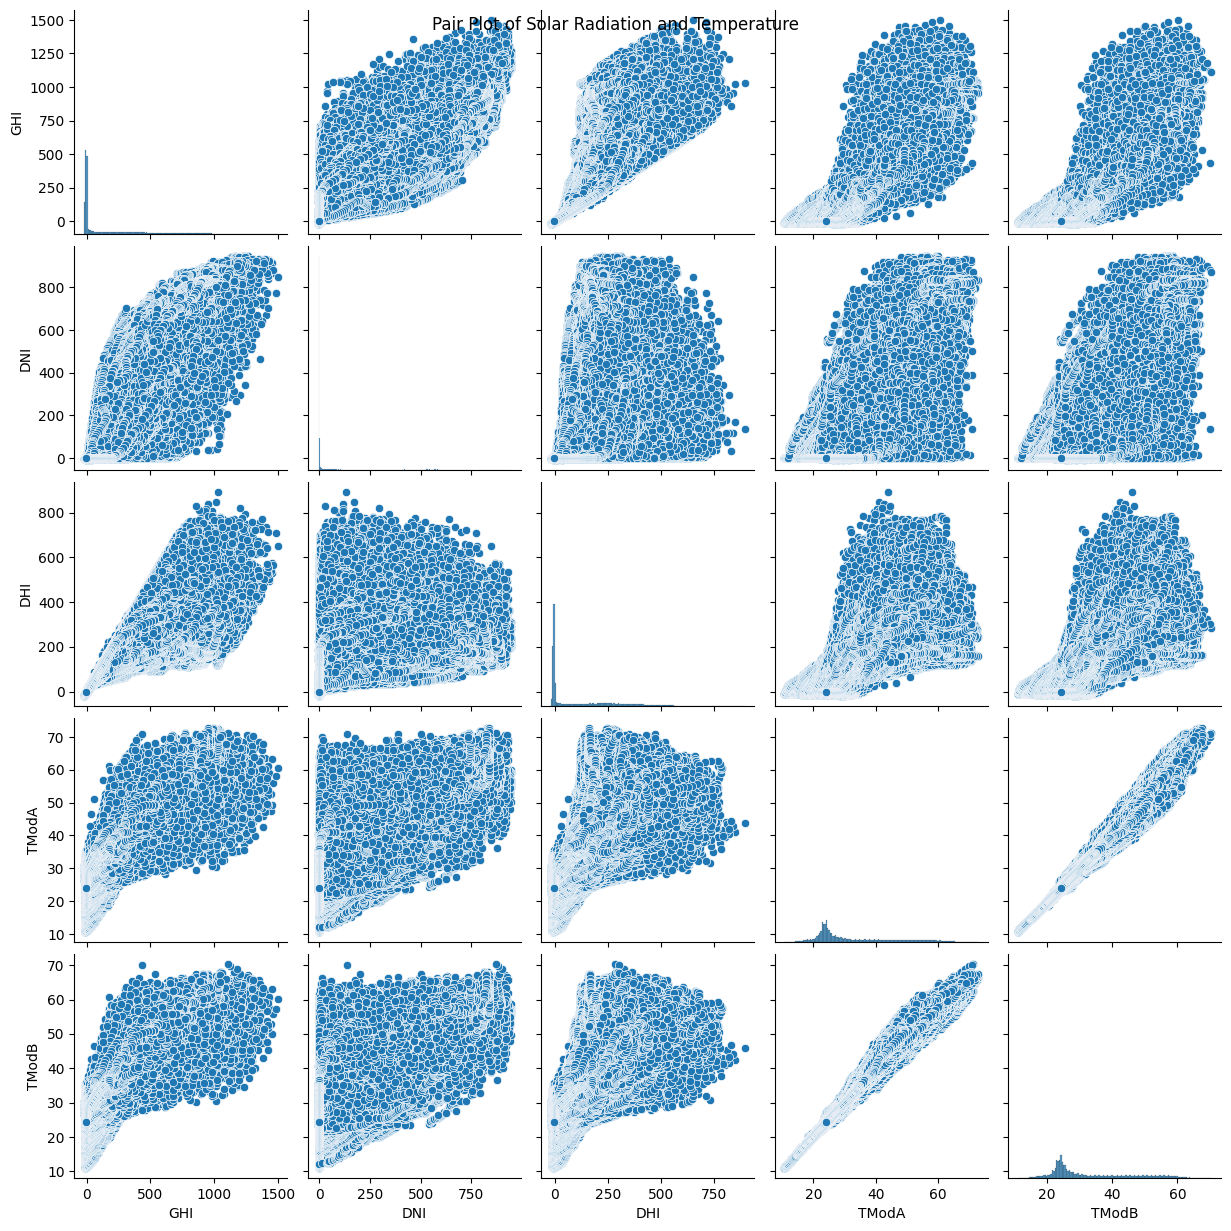

In [19]:
sns.pairplot(sierraleoneData[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.suptitle('Pair Plot of Solar Radiation and Temperature')
plt.show()

 Investigate the relationship between wind conditions and solar irradiance using scatter matrices.

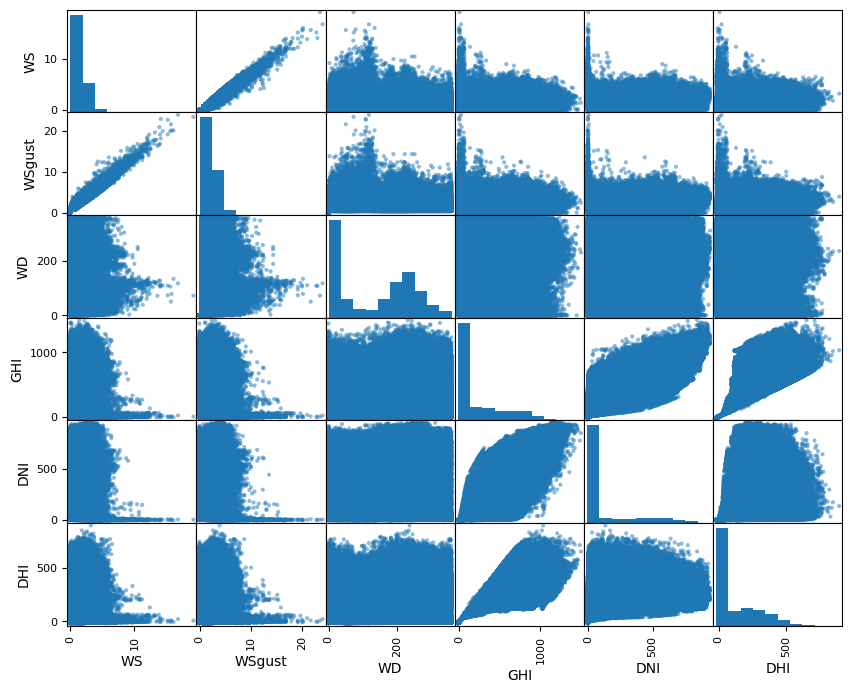

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(sierraleoneData[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']], figsize=(10, 8))
plt.show()

Wind Analysis Using Polar plots

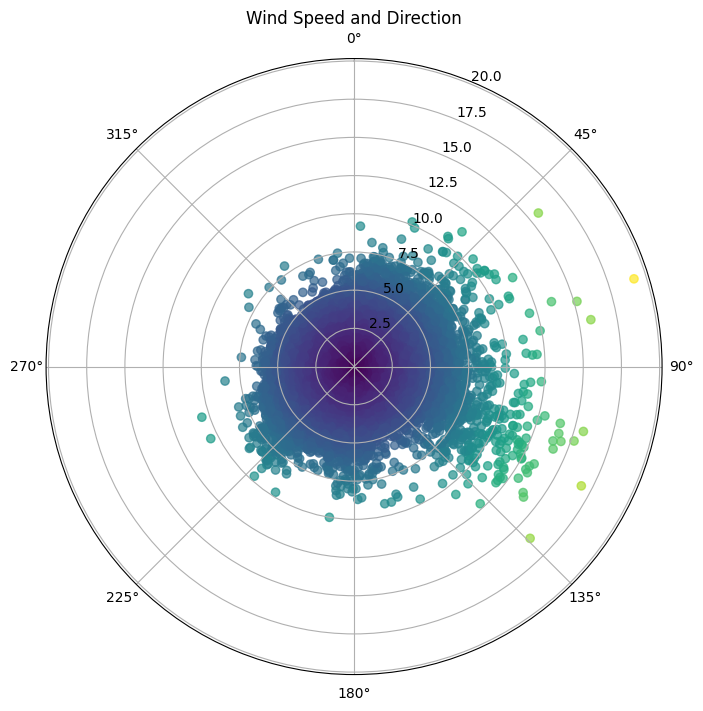

In [23]:
sierraleoneData['WD_rad'] = sierraleoneData['WD'] * np.pi / 180

norm = plt.Normalize(sierraleoneData['WS'].min(), sierraleoneData['WS'].max())

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.scatter(sierraleoneData['WD_rad'], sierraleoneData['WS'], c=sierraleoneData['WS'], cmap="viridis", norm=norm, alpha=0.7)
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
plt.title('Wind Speed and Direction')
# plt.colorbar(label='Wind Speed (m/s)')
plt.show()

Temperature Analysis using Heatmap and Scatter Plots

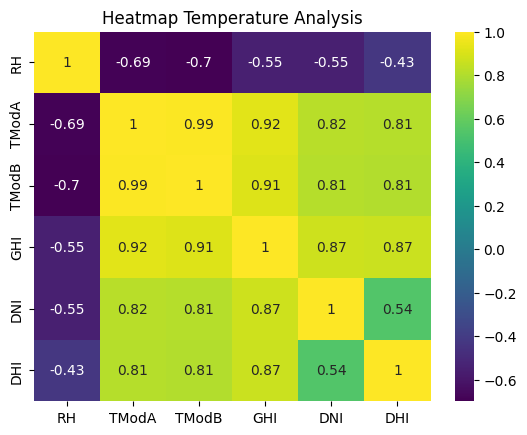

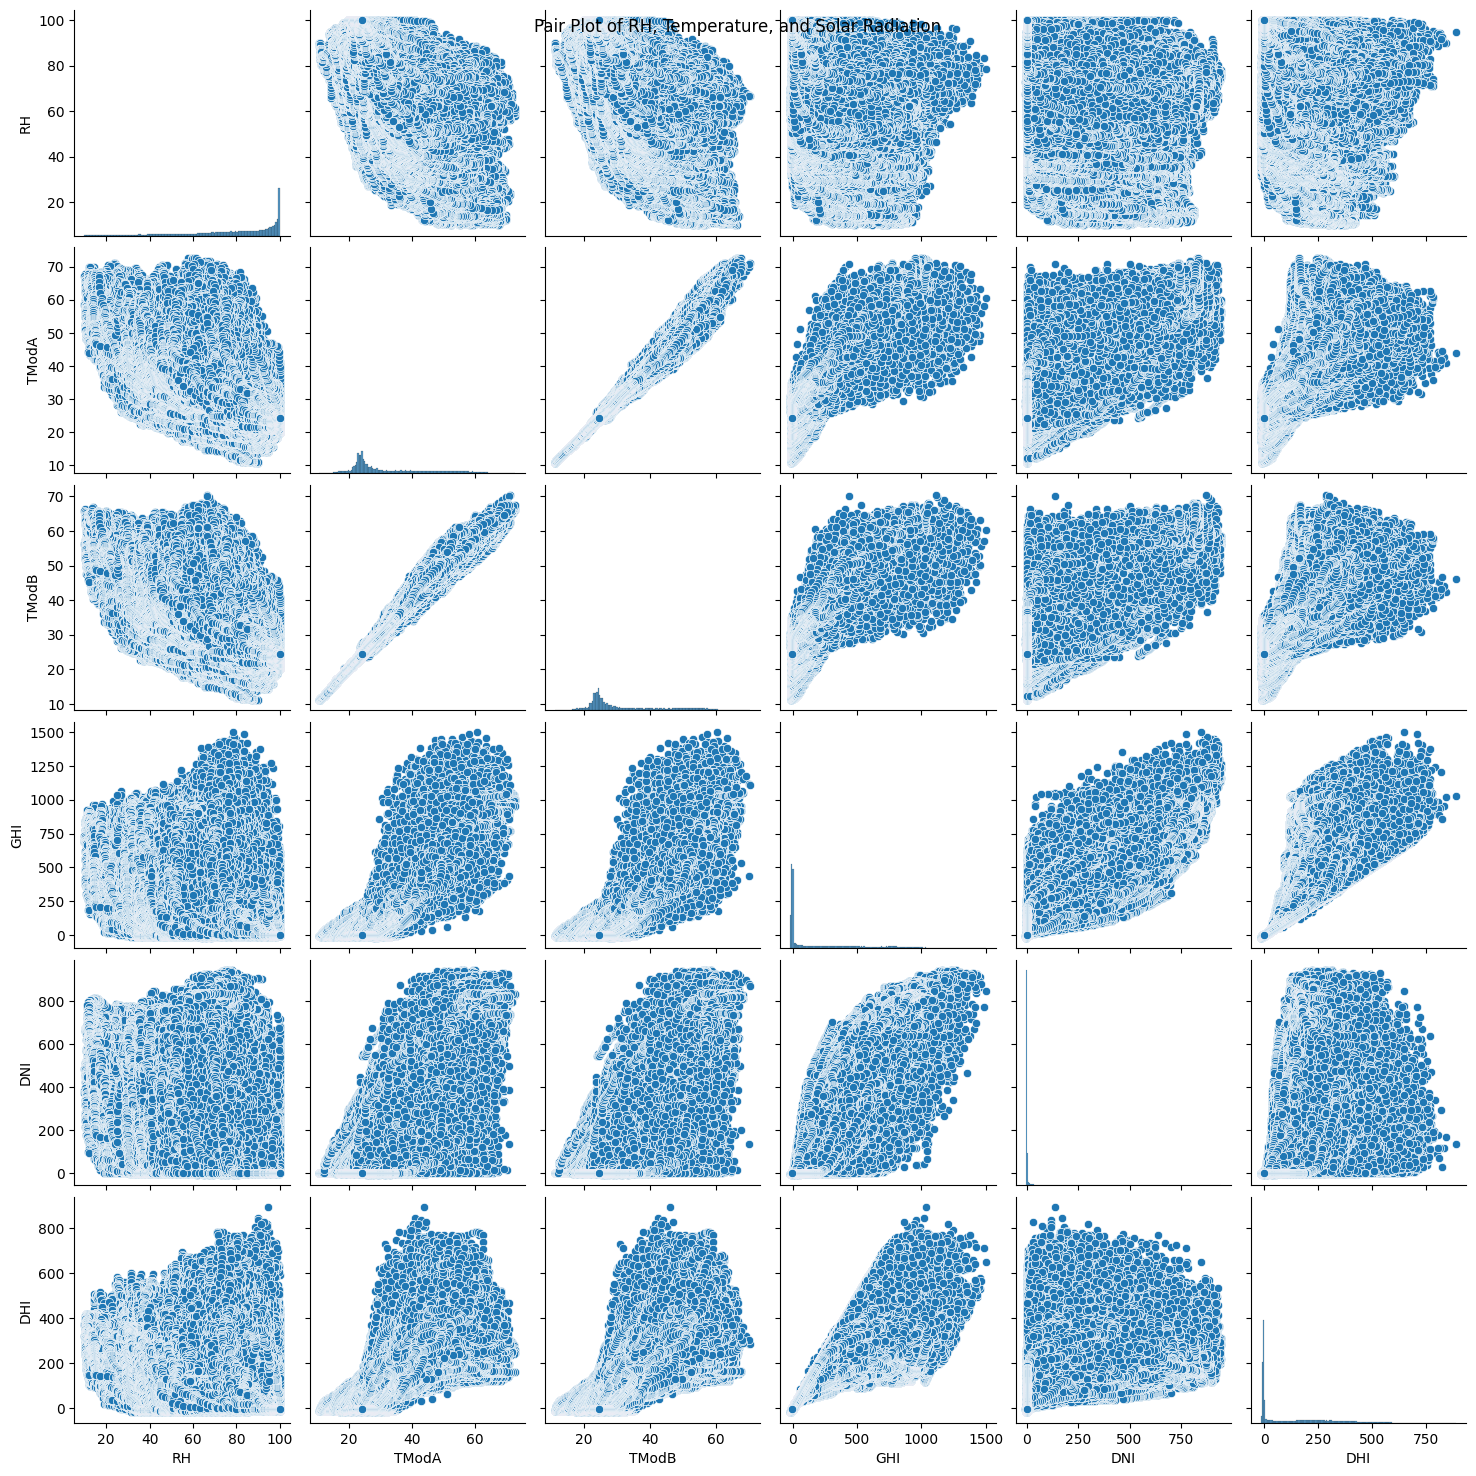

In [21]:
correlation_matrix = sierraleoneData[['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Heatmap Temperature Analysis')
plt.show()

sns.pairplot(sierraleoneData[['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']])
plt.suptitle('Pair Plot of RH, Temperature, and Solar Radiation')
plt.show()

Histograms

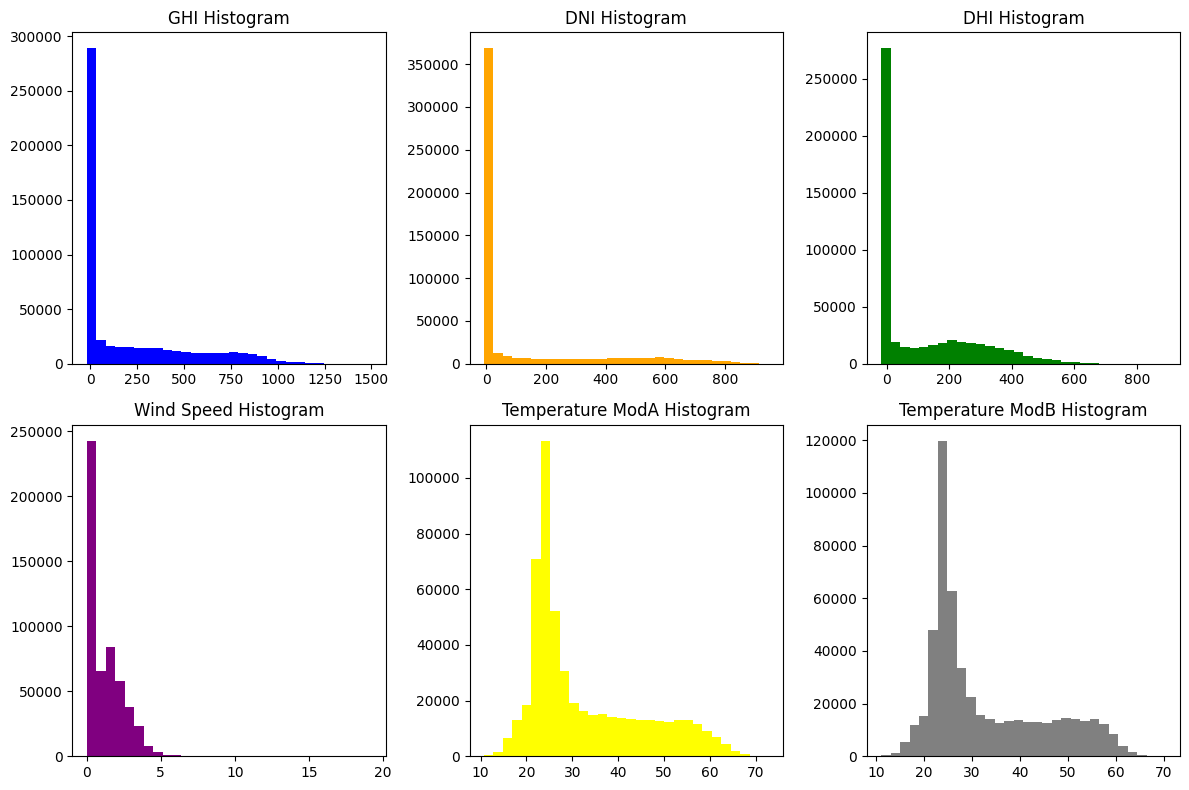

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(sierraleoneData['GHI'], bins=30, color='blue')
plt.title('GHI Histogram')

plt.subplot(2, 3, 2)
plt.hist(sierraleoneData['DNI'], bins=30, color='orange')
plt.title('DNI Histogram')

plt.subplot(2, 3, 3)
plt.hist(sierraleoneData['DHI'], bins=30, color='green')
plt.title('DHI Histogram')

plt.subplot(2, 3, 4)
plt.hist(sierraleoneData['WS'], bins=30, color='purple')
plt.title('Wind Speed Histogram')

plt.subplot(2, 3, 5)
plt.hist(sierraleoneData['TModA'], bins=30, color='yellow')
plt.title('Temperature ModA Histogram')

plt.subplot(2, 3, 6)
plt.hist(sierraleoneData['TModB'], bins=30, color='gray')
plt.title('Temperature ModB Histogram')

plt.tight_layout()
plt.show()

Z-Score Analysis

In [25]:
columns = ["GHI", "DNI", "DHI", "WS", "TModA", "TModB","ModA" , "ModB"]
z_scores = (sierraleoneData[columns] - sierraleoneData[columns].mean()) / sierraleoneData[columns].std()

print(z_scores)

             GHI       DNI       DHI        WS     TModA     TModB      ModA  \
0      -0.678931 -0.532700 -0.720500 -0.924845 -0.820615 -0.832122 -0.686757   
1      -0.678931 -0.532700 -0.720500 -0.924845 -0.820615 -0.832122 -0.686757   
2      -0.678931 -0.532700 -0.720500 -0.924845 -0.820615 -0.832122 -0.686757   
3      -0.678931 -0.532243 -0.720500 -0.924845 -0.820615 -0.832122 -0.686757   
4      -0.678931 -0.532700 -0.720500 -0.924845 -0.820615 -0.832122 -0.686757   
...          ...       ...       ...       ...       ...       ...       ...   
525595 -0.681946 -0.532700 -0.733712 -0.924845 -0.667819 -0.673910 -0.686757   
525596 -0.682281 -0.532700 -0.734341 -0.924845 -0.667819 -0.673910 -0.686757   
525597 -0.682281 -0.532700 -0.734970 -0.924845 -0.675861 -0.682237 -0.686757   
525598 -0.682281 -0.533158 -0.736228 -0.924845 -0.675861 -0.682237 -0.686757   
525599 -0.682281 -0.532700 -0.736857 -0.924845 -0.675861 -0.682237 -0.686757   

            ModB  
0      -0.685781  
1

Bubble charts

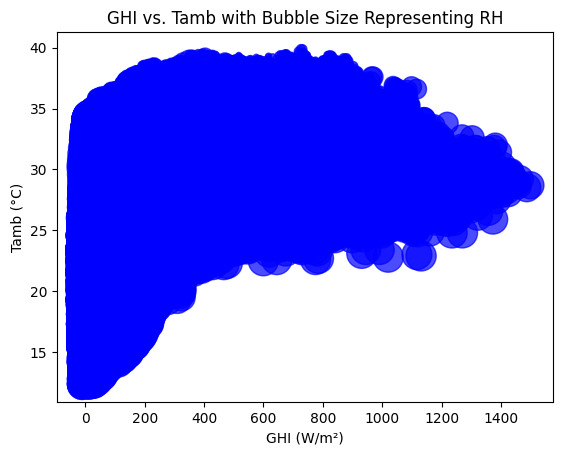

In [26]:
normalized_rh = (sierraleoneData['RH'] - sierraleoneData['RH'].min()) / (sierraleoneData['RH'].max() - sierraleoneData['RH'].min())

plt.scatter(sierraleoneData['GHI'], sierraleoneData['Tamb'], s=normalized_rh * 500, alpha=0.7, c='blue')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.title('GHI vs. Tamb with Bubble Size Representing RH')
plt.show()

Data Cleaning

In [27]:
sierraleoneData.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
WD_rad                0
dtype: int64

In [28]:
sierraleoneData = sierraleoneData.drop(["Comments"], axis=1)

In [29]:
sierraleoneData.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  WD_rad  
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6     0.0  
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6     0.0  
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6     0.0  
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6     0.0  
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6     0.0